In [284]:
#Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Import arrest data
arrest_df = pd.read_csv(r"C:\Users\barrb\Downloads\Arrest Data - ARRESTS.csv")
arrest_df

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24 12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03 14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03 16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05 2:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06 2:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66478,88274,2064627,23175998,40.0,M,W,2023-11-05 16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11 3:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04 0:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN
66481,88277,2064630,23146375,32.0,M,B,2023-09-14 23:44:00,"1000 Block Airport BL Pittsburgh, PA 15231",9501 Bench Warrant,"1000 Block Airport BL Pittsburgh, PA 15231",Outside City,OSC,5599.0,NaN,NaN,-80.255272,40.496059


In [3]:
#View columns
arrest_df.columns

Index(['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME',
       'ARRESTLOCATION', 'OFFENSES', 'INCIDENTLOCATION',
       'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [4]:
#Reduce columns to only necessary ones
arrest_columns = ['AGE', 'GENDER', 'RACE','OFFENSES', 'ARRESTTIME','INCIDENTZONE','X', 'Y']
arrest_df[arrest_columns]

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y
0,42.0,F,B,3929 Retail Theft.,2016-08-24 12:20:00,5,-79.949277,40.452551
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136
2,63.0,F,B,3929 Retail Theft.,2016-08-03 16:45:00,5,-79.891803,40.486625
3,25.0,F,W,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05 2:36:00,1,-80.001939,40.454080
4,25.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06 2:00:00,5,-80.052204,40.445900
...,...,...,...,...,...,...,...,...
66478,40.0,M,W,3304 Criminal Mischief. / 3502 Burglary. / 392...,2023-11-05 16:19:00,1,-80.026065,40.453105
66479,44.0,F,B,5104 Resisting Arrest or Other Law Enforcement...,2023-11-11 3:41:00,6,-80.019190,40.392879
66480,18.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2023-11-04 0:49:00,3,NaN,NaN
66481,32.0,M,B,9501 Bench Warrant,2023-09-14 23:44:00,OSC,-80.255272,40.496059


In [5]:
#Create new dataframe to reference new columns
mj_arrest = arrest_df[arrest_columns]
mj_arrest

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y
0,42.0,F,B,3929 Retail Theft.,2016-08-24 12:20:00,5,-79.949277,40.452551
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136
2,63.0,F,B,3929 Retail Theft.,2016-08-03 16:45:00,5,-79.891803,40.486625
3,25.0,F,W,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05 2:36:00,1,-80.001939,40.454080
4,25.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06 2:00:00,5,-80.052204,40.445900
...,...,...,...,...,...,...,...,...
66478,40.0,M,W,3304 Criminal Mischief. / 3502 Burglary. / 392...,2023-11-05 16:19:00,1,-80.026065,40.453105
66479,44.0,F,B,5104 Resisting Arrest or Other Law Enforcement...,2023-11-11 3:41:00,6,-80.019190,40.392879
66480,18.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2023-11-04 0:49:00,3,NaN,NaN
66481,32.0,M,B,9501 Bench Warrant,2023-09-14 23:44:00,OSC,-80.255272,40.496059


In [6]:
#Create a condition to only view marijuana-related arrests
where_condition_arrest = mj_arrest['OFFENSES'].str.contains("Marijuana|Controlled Substance", na=False)
mj_arrest[where_condition_arrest]

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Con...,2016-08-22 22:09:00,1,-80.001940,40.454137
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,2016-08-27 2:04:00,1,-79.999646,40.455364
19,22.0,M,B,13(a)(16) Possession of Controlled Substance /...,2016-08-12 20:15:00,6,-80.066357,40.451602
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of C...,2016-08-29 11:20:00,2,-79.997406,40.441525
...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance /...,2023-11-13 15:50:00,2,-79.999891,40.438220
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possessio...,2023-11-13 15:50:00,2,-79.999891,40.438220
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance /...,2023-11-13 15:50:00,2,-79.999891,40.438220
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance /...,2006-08-23 17:00:00,1,-80.005665,40.456913


In [7]:
#Create new dataframe to reference only marijuana-related arrest
mj_only_arrest = mj_arrest[where_condition_arrest]
mj_only_arrest

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Con...,2016-08-22 22:09:00,1,-80.001940,40.454137
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Parapherna...,2016-08-27 2:04:00,1,-79.999646,40.455364
19,22.0,M,B,13(a)(16) Possession of Controlled Substance /...,2016-08-12 20:15:00,6,-80.066357,40.451602
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of C...,2016-08-29 11:20:00,2,-79.997406,40.441525
...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance /...,2023-11-13 15:50:00,2,-79.999891,40.438220
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possessio...,2023-11-13 15:50:00,2,-79.999891,40.438220
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance /...,2023-11-13 15:50:00,2,-79.999891,40.438220
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance /...,2006-08-23 17:00:00,1,-80.005665,40.456913


In [8]:
#To fully view Offense column
pd.set_option('display.max_colwidth', None)
mj_only_arrest[where_condition_arrest]

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\1227523362.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mj_only_arrest[where_condition_arrest]


,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525
...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913


In [9]:
#Import citation data
citation_df = pd.read_csv(r"C:\Users\barrb\Downloads\Citation Data - CITATIONS.csv")
citation_df

,_id,PK,CCR,GENDER,RACE,AGE,CITEDTIME,INCIDENTLOCATION,OFFENSES,NEIGHBORHOOD,ZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1078081,16157849,M,B,29.0,2016-08-22 23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
1,2,1078082,16157849,M,W,21.0,2016-08-22 23:45:00,"200 Block N DITHRIDGE ST PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,North Oakland,4,507,8.0,3.0,-79.951692,40.449311
2,3,1078083,16159579,NaN,NaN,NaN,2016-08-25 11:10:00,"NORTH PARK PITTSBURGH, PA",5505 Public Drunkenness,Allegheny Center,1,2204,NaN,NaN,NaN,NaN
3,4,1078084,16159780,M,B,22.0,2016-08-25 16:42:00,"7200 Block FRANKSTOWN AV PITTSBURGH, PA","6501(a)(1) Scattering Rubbish; Any waste, dangerous or detrimental substance upon public property or waters",Homewood South,5,1303,9.0,2.0,-79.896254,40.457329
4,5,1078085,16161591,F,W,22.0,2016-08-28 0:58:00,"6100 Block BERLIN WY PITTSBURGH, PA",5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,Upper Lawrenceville,2,1011,7.0,2.0,-79.946664,40.485403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16290,26807,1105891,23179537,F,B,28.0,2023-11-12 0:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",5505 Public Drunkenness,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16291,26808,1105892,23179537,F,B,28.0,2023-11-12 0:54:00,"1700 Block E CARSON ST PITTSBURGH, PA",601.12 Interference with Official Duties,NaN,3,NaN,3.0,3.0,-79.981872,40.428593
16292,26809,1105893,23179983,F,W,23.0,2023-11-12 23:31:00,"E CARSON ST & S 13TH ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.985330,40.428783
16293,26810,1105894,23180037,F,B,24.0,2023-11-13 2:08:00,"S 17TH ST & E CARSON ST PITTSBURGH, PA",601.08 (a) Open Container Law,NaN,3,NaN,3.0,3.0,-79.982051,40.428843


In [10]:
#View citation columns
citation_df.columns

Index(['_id', 'PK', 'CCR', 'GENDER', 'RACE', 'AGE', 'CITEDTIME',
       'INCIDENTLOCATION', 'OFFENSES', 'NEIGHBORHOOD', 'ZONE', 'INCIDENTTRACT',
       'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y'],
      dtype='object')

In [11]:
#Reduce the number of columns to only necessary ones
citation_columns = ['GENDER', 'RACE', 'AGE','OFFENSES', 'CITEDTIME','ZONE','X', 'Y']
citation_df[citation_columns]

,GENDER,RACE,AGE,OFFENSES,CITEDTIME,ZONE,X,Y
0,M,B,29.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-22 23:45:00,4,-79.951692,40.449311
1,M,W,21.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-22 23:45:00,4,-79.951692,40.449311
2,NaN,NaN,NaN,5505 Public Drunkenness,2016-08-25 11:10:00,1,NaN,NaN
3,M,B,22.0,"6501(a)(1) Scattering Rubbish; Any waste, dangerous or detrimental substance upon public property or waters",2016-08-25 16:42:00,5,-79.896254,40.457329
4,F,W,22.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-28 0:58:00,2,-79.946664,40.485403
...,...,...,...,...,...,...,...,...
16290,F,B,28.0,5505 Public Drunkenness,2023-11-12 0:54:00,3,-79.981872,40.428593
16291,F,B,28.0,601.12 Interference with Official Duties,2023-11-12 0:54:00,3,-79.981872,40.428593
16292,F,W,23.0,601.08 (a) Open Container Law,2023-11-12 23:31:00,3,-79.985330,40.428783
16293,F,B,24.0,601.08 (a) Open Container Law,2023-11-13 2:08:00,3,-79.982051,40.428843


In [12]:
#Create new datafram to reference new columns
mj_citation = citation_df[citation_columns]
mj_citation

,GENDER,RACE,AGE,OFFENSES,CITEDTIME,ZONE,X,Y
0,M,B,29.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-22 23:45:00,4,-79.951692,40.449311
1,M,W,21.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-22 23:45:00,4,-79.951692,40.449311
2,NaN,NaN,NaN,5505 Public Drunkenness,2016-08-25 11:10:00,1,NaN,NaN
3,M,B,22.0,"6501(a)(1) Scattering Rubbish; Any waste, dangerous or detrimental substance upon public property or waters",2016-08-25 16:42:00,5,-79.896254,40.457329
4,F,W,22.0,5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE,2016-08-28 0:58:00,2,-79.946664,40.485403
...,...,...,...,...,...,...,...,...
16290,F,B,28.0,5505 Public Drunkenness,2023-11-12 0:54:00,3,-79.981872,40.428593
16291,F,B,28.0,601.12 Interference with Official Duties,2023-11-12 0:54:00,3,-79.981872,40.428593
16292,F,W,23.0,601.08 (a) Open Container Law,2023-11-12 23:31:00,3,-79.985330,40.428783
16293,F,B,24.0,601.08 (a) Open Container Law,2023-11-13 2:08:00,3,-79.982051,40.428843


In [13]:
#Create a condition to only reference marijuana-ralated citations
where_condition_citation = mj_citation['OFFENSES'].str.contains("Marijuana", case=False)
mj_citation[where_condition_citation]

,GENDER,RACE,AGE,OFFENSES,CITEDTIME,ZONE,X,Y
911,M,B,20.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-15 1:00:00,1,NaN,NaN
945,M,B,19.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-19 22:10:00,2,-80.001620,40.441773
947,M,B,48.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-20 1:30:00,5,-79.890381,40.455032
965,F,W,20.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884
966,M,W,21.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884
...,...,...,...,...,...,...,...,...
16259,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755
16270,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678
16280,M,B,23.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693
16281,M,B,28.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693


In [14]:
#Create a new dataframe to reference only marijuana-related citations
mj_only_citation = mj_citation[where_condition_citation]
mj_only_citation

,GENDER,RACE,AGE,OFFENSES,CITEDTIME,ZONE,X,Y
911,M,B,20.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-15 1:00:00,1,NaN,NaN
945,M,B,19.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-19 22:10:00,2,-80.001620,40.441773
947,M,B,48.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-20 1:30:00,5,-79.890381,40.455032
965,F,W,20.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884
966,M,W,21.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884
...,...,...,...,...,...,...,...,...
16259,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755
16270,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678
16280,M,B,23.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693
16281,M,B,28.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693


In [15]:
#Create a "record type" for arrest and citation
mj_only_arrest['record_type']="Arrest"
mj_only_citation['record_type']="Citation"

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\1419679407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mj_only_arrest['record_type']="Arrest"
C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\1419679407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mj_only_citation['record_type']="Citation"


In [16]:
#View new columns

In [17]:
mj_only_arrest

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest


In [18]:
mj_only_citation

,GENDER,RACE,AGE,OFFENSES,CITEDTIME,ZONE,X,Y,record_type
911,M,B,20.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-15 1:00:00,1,NaN,NaN,Citation
945,M,B,19.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-19 22:10:00,2,-80.001620,40.441773,Citation
947,M,B,48.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-20 1:30:00,5,-79.890381,40.455032,Citation
965,F,W,20.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
966,M,W,21.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
...,...,...,...,...,...,...,...,...,...
16259,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,M,B,23.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,M,B,28.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


In [19]:
#Change column to "ZONE" for arrest and CITEDTIME and ARRESTTIME to DATE so that the two datas can be merged
mj_only_arrest = mj_only_arrest.rename(columns={
    'INCIDENTZONE': 'ZONE', 
    'ARRESTTIME': 'DATE'})
mj_only_citation = mj_only_citation.rename(columns={
    'CITEDTIME': 'DATE',})

In [20]:
#View new column headings

In [21]:
mj_only_arrest

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest


In [22]:
mj_only_citation

,GENDER,RACE,AGE,OFFENSES,DATE,ZONE,X,Y,record_type
911,M,B,20.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-15 1:00:00,1,NaN,NaN,Citation
945,M,B,19.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-19 22:10:00,2,-80.001620,40.441773,Citation
947,M,B,48.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-20 1:30:00,5,-79.890381,40.455032,Citation
965,F,W,20.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
966,M,W,21.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
...,...,...,...,...,...,...,...,...,...
16259,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,M,B,23.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,M,B,28.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


In [23]:
#Combine the two transformed dataframs into one dataframe
pd.concat([mj_only_arrest, mj_only_citation], axis=0)

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
16259,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,23.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,28.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


In [24]:
#Create new dataframe to reference the combined data
mj_df = pd.concat([mj_only_arrest, mj_only_citation], axis=0)
mj_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
16259,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,23.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,28.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


In [25]:
#Change DATE to datetime in order to make a line graph of marijuana arrests by year

In [26]:
mj_df['DATE'] = pd.to_datetime(mj_df['DATE'])

In [27]:
mj_df['YEAR'] = [x.year for x in mj_df['DATE']]

In [28]:
#Create line graph showing Marijuana arrests by year
arrest_citations_by_year_df = mj_df.groupby(['YEAR','record_type']).\
aggregate(rec_count=('DATE','count')).\
reset_index().\
copy()

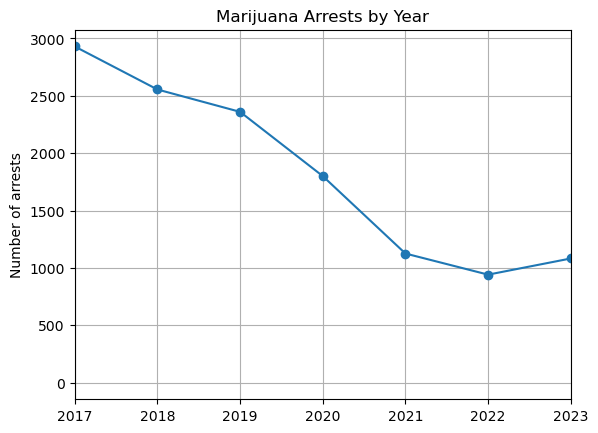

In [29]:
plt.plot(arrest_citations_by_year_df['YEAR']
         .loc[arrest_citations_by_year_df['record_type']=='Arrest'],
       arrest_citations_by_year_df['rec_count']
         .loc[arrest_citations_by_year_df['record_type']=='Arrest'], marker ='o', linestyle='solid')
plt.title('Marijuana Arrests by Year')
plt.ylabel('Number of arrests')
plt.xlim(2017,2023)
plt.grid()
plt.show()

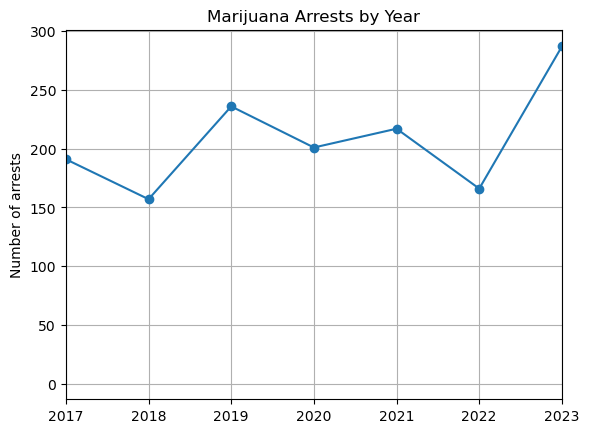

In [30]:
#Create line graph showing marijuana citations by year
plt.plot(arrest_citations_by_year_df['YEAR']
         .loc[arrest_citations_by_year_df['record_type']=='Citation'],
       arrest_citations_by_year_df['rec_count']
         .loc[arrest_citations_by_year_df['record_type']=='Citation'], marker ='o', linestyle='solid')
plt.title('Marijuana Arrests by Year')
plt.ylabel('Number of arrests')
plt.xlim(2017,2023)
plt.grid()
plt.show()

In [31]:
#Plot a bar graph of the total numbers of marijuana arrests and citations by zone

In [32]:
mj_arrests_by_zone = mj_df.groupby(['ZONE', 'record_type']).\
aggregate(mj_count_zone = ('OFFENSES', 'count')).\
reset_index()

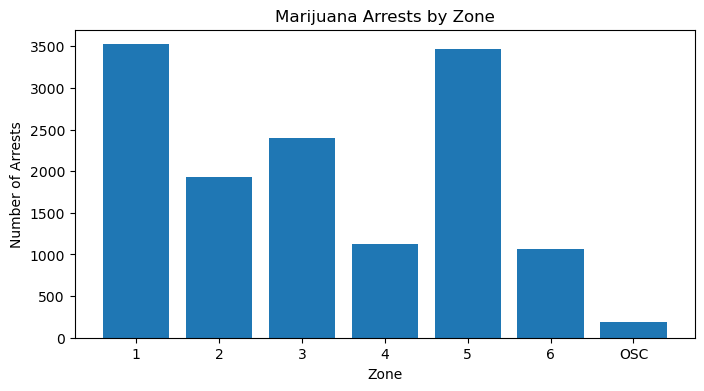

In [33]:
plt.figure(figsize=(8,4))
record_type_citation = mj_arrests_by_zone['record_type']== 'Arrest'
mj_with_record_type_citation = mj_arrests_by_zone.loc[record_type_citation]
plt.bar(x=mj_with_record_type_citation['ZONE'], 
    height=mj_with_record_type_citation['mj_count_zone'], 
    width=0.8)
plt.ylabel('Number of Arrests')
plt.xlabel('Zone')
plt.title('Marijuana Arrests by Zone')
plt.show()

In [34]:
#Create pie chart of pct arreset by zone
mj_by_zone = mj_df.groupby(['ZONE', 'record_type']).\
            aggregate(mj_count_zone = ('OFFENSES', 'count')).\
            reset_index().copy()
mj_by_zone

,ZONE,record_type,mj_count_zone
0,1,Arrest,3524
1,1,Citation,137
2,2,Arrest,1928
3,2,Citation,120
4,3,Arrest,2403
5,3,Citation,383
6,4,Arrest,1128
7,4,Citation,171
8,5,Arrest,3470
9,5,Citation,520


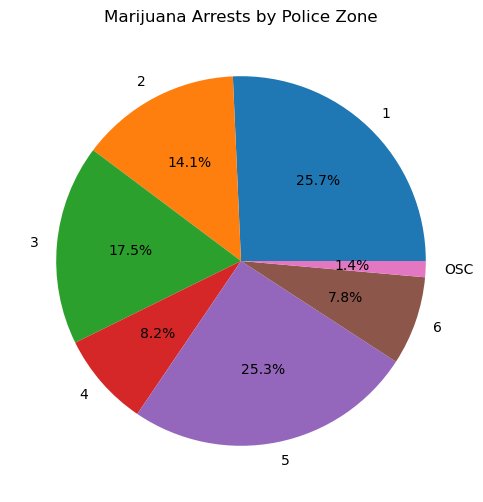

In [35]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Arrest'],
        labels=mj_by_zone['ZONE'].loc[mj_by_zone['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

In [36]:
#Plot a bar graph of the total numbers of marijuana citations by zone

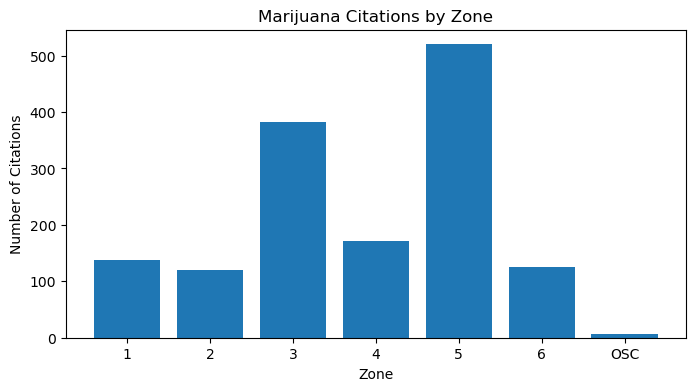

In [37]:
plt.figure(figsize=(8,4))
record_type_citation = mj_arrests_by_zone['record_type']== 'Citation'
mj_with_record_type_citation = mj_arrests_by_zone.loc[record_type_citation]
plt.bar(x=mj_with_record_type_citation['ZONE'], 
    height=mj_with_record_type_citation['mj_count_zone'], 
    width=0.8)
plt.ylabel('Number of Citations')
plt.xlabel('Zone')
plt.title('Marijuana Citations by Zone')
plt.show()

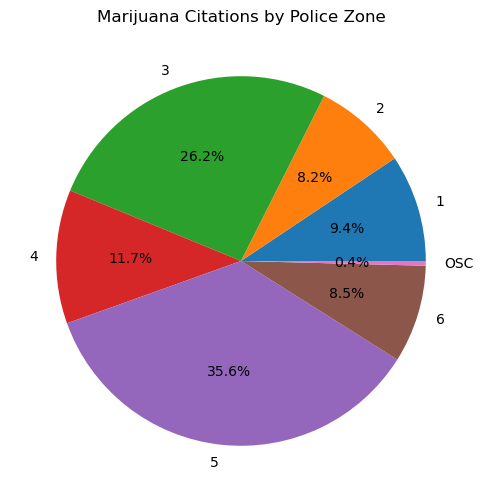

In [38]:
#Create bar graph of pct citation by zone
plt.figure(figsize=(6,6))

plt.pie(mj_by_zone['mj_count_zone'].loc[mj_by_zone['record_type']=='Citation'],
        labels=mj_by_zone['ZONE'].loc[mj_by_zone['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Police Zone')
plt.savefig('Marijuana_citations_by_zone.png')
plt.show()

In [39]:
#Plot a bar graph for total number of arrests and citations by year and zone (2016)

In [40]:
mj_2016 = mj_df[mj_df['DATE'].dt.year == 2016]

In [41]:
mj_arrests_2016 = mj_2016['record_type'] == 'Arrest' 

In [42]:
mj_arrests_2016_df = mj_2016[mj_arrests_2016]

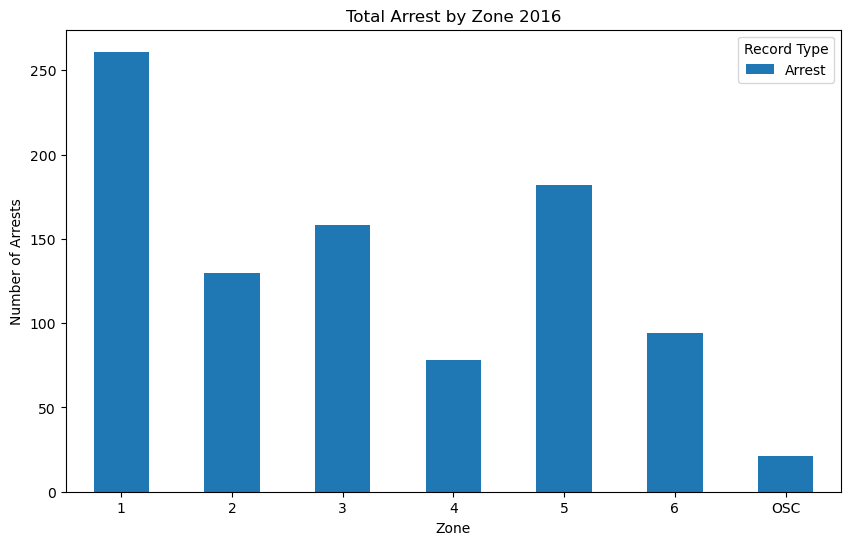

In [43]:
mj_arrests_only_2016 = mj_arrests_2016_df.groupby(['ZONE', 'record_type']).size().unstack()

mj_arrests_only_2016.plot(kind='bar', figsize=(10, 6))
plt.title('Total Arrest by Zone 2016')
plt.xlabel('Zone')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Record Type')
plt.show()

In [44]:
#Plot a bar graph for total number of arrests and citations by year and zone (2023)

In [45]:
mj_2023 = mj_df[mj_df['DATE'].dt.year == 2023]

In [46]:
mj_arrests_2023 = mj_2023['record_type'] == 'Arrest' 

In [47]:
mj_arrests_2023_df = mj_2023[mj_arrests_2023]

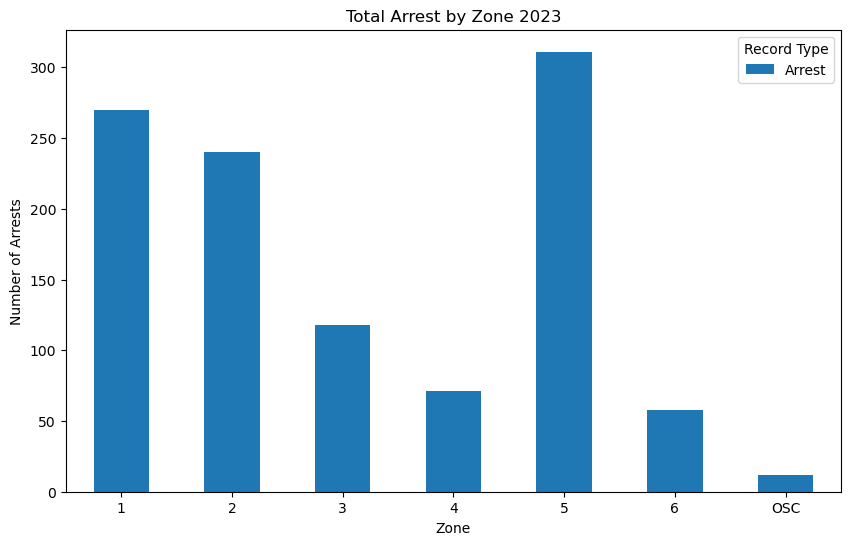

In [48]:
mj_arrests_only_2023 = mj_arrests_2023_df.groupby(['ZONE', 'record_type']).size().unstack()

mj_arrests_only_2023.plot(kind='bar', figsize=(10, 6))
plt.title('Total Arrest by Zone 2023')
plt.xlabel('Zone')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Record Type')
plt.show()

In [49]:
#Plot bar graphs for total arrests and citations by year (2016 and 2023)

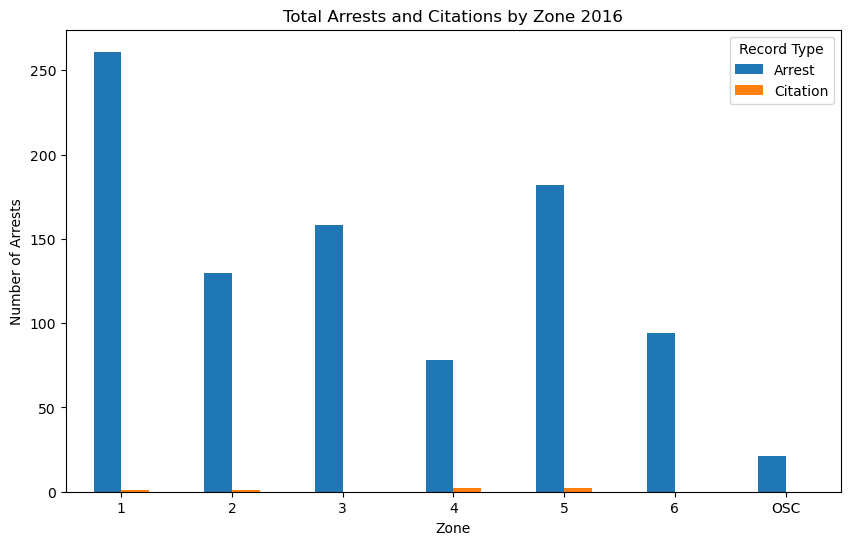

In [50]:
totatl_arrests_2016 = mj_2016.groupby(['ZONE', 'record_type']).size().unstack()

totatl_arrests_2016.plot(kind='bar', figsize=(10, 6))
plt.title('Total Arrests and Citations by Zone 2016')
plt.xlabel('Zone')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Record Type')
plt.show()

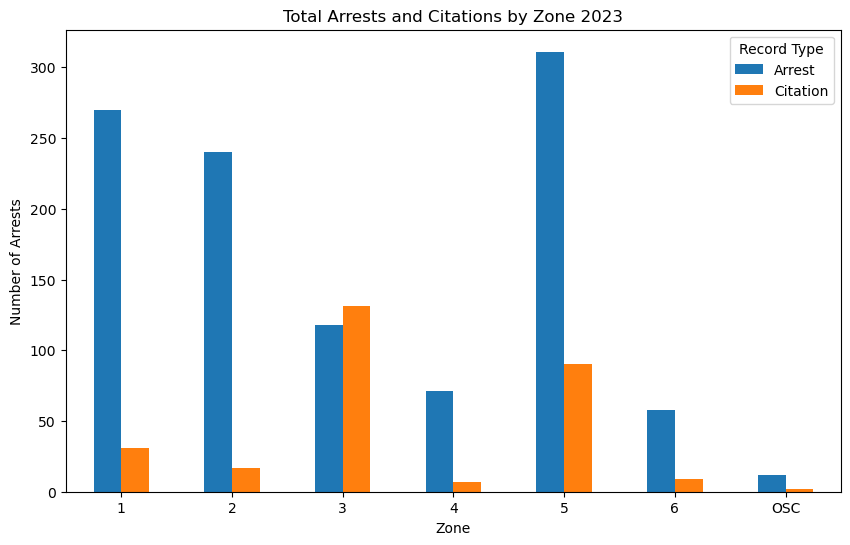

In [51]:
totatl_arrests_2023 = mj_2023.groupby(['ZONE', 'record_type']).size().unstack()

totatl_arrests_2023.plot(kind='bar', figsize=(10, 6))
plt.title('Total Arrests and Citations by Zone 2023')
plt.xlabel('Zone')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Record Type')
plt.show()

In [52]:
#Create a pivot table so we can turn this into a stacked bar chart
mj_arrests_zone_race_BHW = mj_df.loc[mj_df['RACE'].isin(['B','H','W'])].\
  groupby(['ZONE','RACE','record_type']).\
  aggregate(mj_count_zone_race =('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [53]:
mj_arrests_zone_race_BHW

,ZONE,RACE,record_type,mj_count_zone_race
0,1,B,Arrest,2230
1,1,B,Citation,116
2,1,H,Arrest,20
3,1,W,Arrest,1240
4,1,W,Citation,19
5,2,B,Arrest,1318
6,2,B,Citation,91
7,2,H,Arrest,16
8,2,H,Citation,1
9,2,W,Arrest,570


In [54]:
arrests_zone_race_pivot = mj_arrests_zone_race_BHW.pivot(index=['ZONE','record_type'],
                                               columns ='RACE',values='mj_count_zone_race').\
copy()

In [55]:
arrests_zone_race_pivot

RACE                   B     H       W
ZONE record_type                      
1    Arrest       2230.0  20.0  1240.0
     Citation      116.0   NaN    19.0
2    Arrest       1318.0  16.0   570.0
     Citation       91.0   1.0    25.0
3    Arrest       1175.0  16.0  1159.0
     Citation      273.0   2.0    99.0
4    Arrest        659.0   8.0   440.0
     Citation      104.0   2.0    59.0
5    Arrest       2912.0  12.0   515.0
     Citation      478.0   5.0    32.0
6    Arrest        549.0  10.0   489.0
     Citation       90.0   NaN    31.0
OSC  Arrest        141.0   1.0    49.0
     Citation        6.0   NaN     NaN

In [56]:
mj_arrests_by_zone_BHW = mj_df.loc[mj_df['RACE'].isin(['B','H','W'])].\
  groupby(['ZONE','record_type']).\
  aggregate(mj_count_zone = ('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [57]:
mj_zone_race_pvt = mj_arrests_zone_race_BHW.pivot(index=['ZONE','record_type'], columns='RACE', values='mj_count_zone_race').\
reset_index().\
copy()

In [58]:
mj_zone_race_pvt.columns
mj_zone_race_pvt

RACE,ZONE,record_type,B,H,W
0,1,Arrest,2230.0,20.0,1240.0
1,1,Citation,116.0,NaN,19.0
2,2,Arrest,1318.0,16.0,570.0
3,2,Citation,91.0,1.0,25.0
4,3,Arrest,1175.0,16.0,1159.0
5,3,Citation,273.0,2.0,99.0
6,4,Arrest,659.0,8.0,440.0
7,4,Citation,104.0,2.0,59.0
8,5,Arrest,2912.0,12.0,515.0
9,5,Citation,478.0,5.0,32.0


In [59]:
mj_zone_race_pvt = mj_zone_race_pvt.set_index('record_type')

In [60]:
mj_zone_race_pvt.loc['Arrest']

RACE,ZONE,B,H,W
record_type,,,,
Arrest,1,2230.0,20.0,1240.0
Arrest,2,1318.0,16.0,570.0
Arrest,3,1175.0,16.0,1159.0
Arrest,4,659.0,8.0,440.0
Arrest,5,2912.0,12.0,515.0
Arrest,6,549.0,10.0,489.0
Arrest,OSC,141.0,1.0,49.0


In [61]:
mj_zone_race_with_totals = mj_zone_race_pvt.merge(mj_arrests_by_zone_BHW, how='left', on=['ZONE','record_type'])

In [62]:
mj_zone_race_with_totals

,ZONE,record_type,B,H,W,mj_count_zone
0,1,Arrest,2230.0,20.0,1240.0,3490
1,1,Citation,116.0,NaN,19.0,135
2,2,Arrest,1318.0,16.0,570.0,1904
3,2,Citation,91.0,1.0,25.0,117
4,3,Arrest,1175.0,16.0,1159.0,2350
5,3,Citation,273.0,2.0,99.0,374
6,4,Arrest,659.0,8.0,440.0,1107
7,4,Citation,104.0,2.0,59.0,165
8,5,Arrest,2912.0,12.0,515.0,3439
9,5,Citation,478.0,5.0,32.0,515


In [63]:
#Create portions for each race
mj_zone_race_with_totals['Black']= mj_zone_race_with_totals['B']/mj_zone_race_with_totals['mj_count_zone']
mj_zone_race_with_totals['Hispanic']= mj_zone_race_with_totals['H']/mj_zone_race_with_totals['mj_count_zone']
mj_zone_race_with_totals['White']= mj_zone_race_with_totals['W']/mj_zone_race_with_totals['mj_count_zone']
mj_zone_race_with_totals['grand_total'] = mj_zone_race_with_totals['B'] + mj_zone_race_with_totals['H'] + mj_zone_race_with_totals['W']

In [64]:
proportions_df = mj_zone_race_with_totals.loc[:,['ZONE','record_type','Black','Hispanic','White']].\
copy()

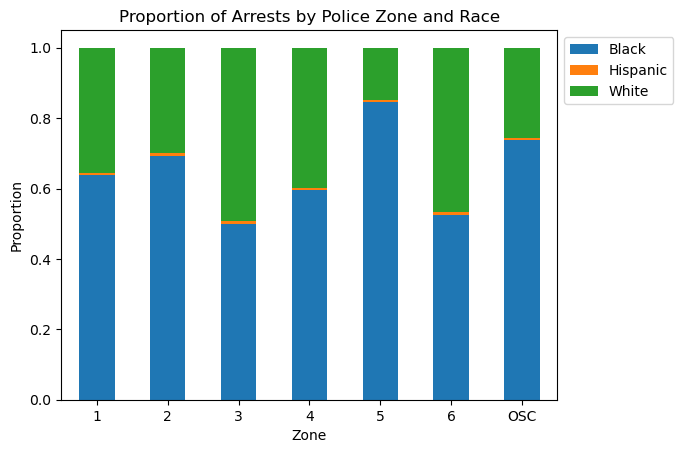

In [65]:
#Create stacked bar graph for arrests by zone and race
proportions_df.loc[proportions_df['record_type']=='Arrest'].\
plot(x='ZONE',kind='bar', stacked=True)
plt.title('Proportion of Arrests by Police Zone and Race')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

In [66]:
#Create pie chart of portion of arrests by race
mj_by_race = mj_df.groupby(['RACE', 'record_type']).\
            aggregate(mj_count_race = ('OFFENSES', 'count')).\
            reset_index().copy()

In [67]:
mj_by_race_BHW = mj_by_race.loc[mj_by_race['RACE'].isin(['B','H','W'])].copy()

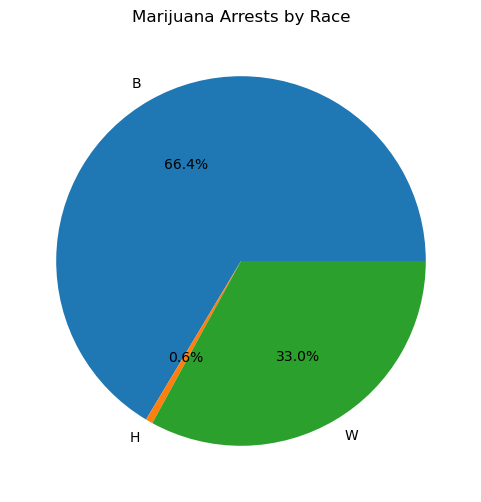

In [68]:
plt.figure(figsize=(6,6))

plt.pie(mj_by_race_BHW['mj_count_race'].loc[mj_by_race_BHW['record_type']=='Arrest'],
        labels=mj_by_race_BHW['RACE'].loc[mj_by_race_BHW['record_type']=='Arrest'],
        autopct='%1.1f%%')

plt.title('Marijuana Arrests by Race')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

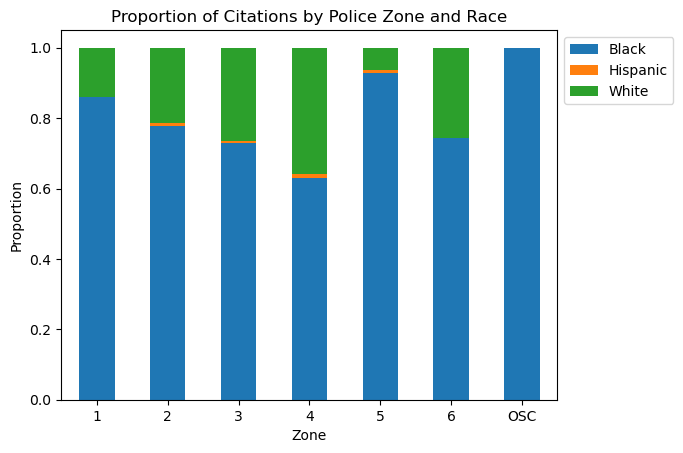

In [69]:
#Create stacked bar graph for citations by zone and race
proportions_df.loc[proportions_df['record_type']=='Citation'].\
plot(x='ZONE',kind='bar', stacked=True)
plt.title('Proportion of Citations by Police Zone and Race')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

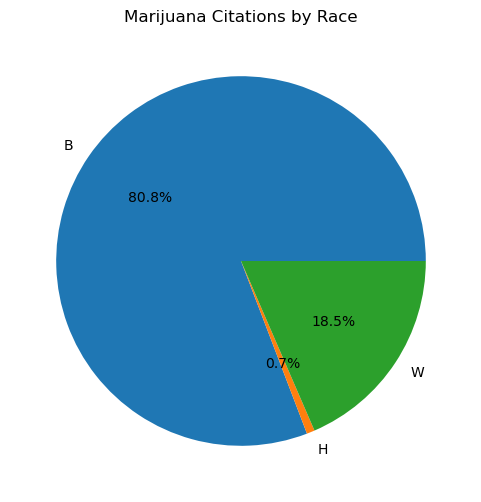

In [70]:
#Create pie chart for portion of citations by race
plt.figure(figsize=(6,6))

plt.pie(mj_by_race_BHW['mj_count_race'].loc[mj_by_race_BHW['record_type']=='Citation'],
        labels=mj_by_race_BHW['RACE'].loc[mj_by_race_BHW['record_type']=='Citation'],
        autopct='%1.1f%%')

plt.title('Marijuana Citations by Race')
plt.savefig('Marijuana_citations_by_race.png')
plt.show()

In [71]:
#Create graph of portion of arrest by race for each year

In [72]:
mj_white_arrest = mj_df[mj_df['RACE']== "W"]

In [73]:
mj_black_arrest = mj_df[mj_df['RACE']== "B"]

In [74]:
mj_black_arrest['record_type']=='Arrest'

14        True
19        True
22        True
38        True
57        True
         ...  
16259    False
16270    False
16280    False
16281    False
16294    False
Name: record_type, Length: 10154, dtype: bool

In [75]:
mj_white_arrest['record_type']=='Arrest'

1         True
16        True
33        True
72        True
81        True
         ...  
16129    False
16142    False
16150    False
16151    False
16247    False
Name: record_type, Length: 4731, dtype: bool

In [76]:
mj_white_arrest_only = mj_white_arrest[mj_white_arrest['record_type']=='Arrest']

In [77]:
mj_black_arrest_only = mj_black_arrest[mj_black_arrest['record_type']=='Arrest']

In [78]:
mj_black_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

,YEAR,record_type,count
0,2006,Arrest,1
1,2007,Arrest,1
2,2010,Arrest,1
3,2014,Arrest,1
4,2015,Arrest,5
5,2016,Arrest,529
6,2017,Arrest,1720
7,2018,Arrest,1624
8,2019,Arrest,1563
9,2020,Arrest,1272


In [79]:
mj_white_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

,YEAR,record_type,count
0,2014,Arrest,1
1,2015,Arrest,1
2,2016,Arrest,378
3,2017,Arrest,1142
4,2018,Arrest,881
5,2019,Arrest,751
6,2020,Arrest,493
7,2021,Arrest,329
8,2022,Arrest,251
9,2023,Arrest,239


In [80]:
mj_white_count = mj_white_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')
mj_black_count = mj_black_arrest_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

In [81]:
mj_white_count_year = mj_white_arrest_only[mj_white_arrest_only['YEAR']>=2016]
mj_black_count_year = mj_black_arrest_only[mj_black_arrest_only['YEAR']>=2016]

In [82]:
mj_black_count_year.groupby(['YEAR']).size()

YEAR
2016     529
2017    1720
2018    1624
2019    1563
2020    1272
2021     779
2022     674
2023     826
dtype: int64

In [83]:
mj_white_count_year.groupby(['YEAR']).size()

YEAR
2016     378
2017    1142
2018     881
2019     751
2020     493
2021     329
2022     251
2023     239
dtype: int64

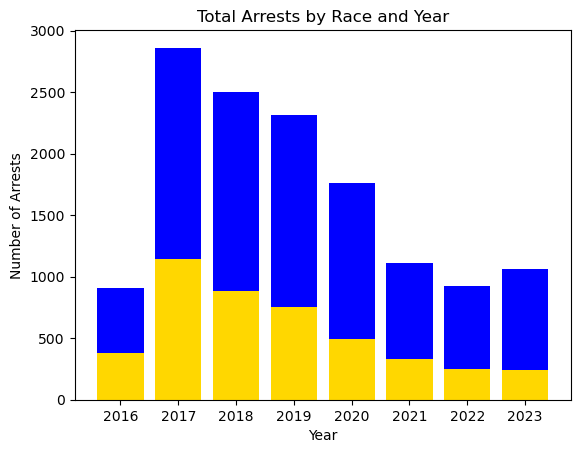

In [84]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y1 = mj_white_count_year.groupby(['YEAR']).size()
y2 = mj_black_count_year.groupby(['YEAR']).size()

plt.bar(x, y1,color='Gold')
plt.bar(x, y2, bottom=y1, color='Blue')
plt.title('Total Arrests by Race and Year')
plt.ylabel('Number of Arrests')
plt.xlabel('Year')
plt.show()

In [85]:
#Create graph of portion of Citations by race for each year

In [86]:
mj_white_citation = mj_df[mj_df['RACE']== "W"]
mj_black_citation = mj_df[mj_df['RACE']== "B"]

In [87]:
mj_white_citation['record_type']=='Citation'

1        False
16       False
33       False
72       False
81       False
         ...  
16129     True
16142     True
16150     True
16151     True
16247     True
Name: record_type, Length: 4731, dtype: bool

In [88]:
mj_black_citation['record_type']=='Citation'

14       False
19       False
22       False
38       False
57       False
         ...  
16259     True
16270     True
16280     True
16281     True
16294     True
Name: record_type, Length: 10154, dtype: bool

In [89]:
mj_white_citation_only = mj_white_citation[mj_white_citation['record_type']=='Citation']

In [90]:
mj_black_citation_only = mj_black_citation[mj_black_citation['record_type']=='Citation']

In [91]:
mj_white_cit_count = mj_white_citation_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')
mj_black_cit_count = mj_black_citation_only.groupby(['YEAR', 'record_type']).size().reset_index(name='count')

In [92]:
mj_white_citation_year = mj_white_citation_only[mj_white_citation_only['YEAR']>=2016]
mj_black_citation_year = mj_black_citation_only[mj_black_citation_only['YEAR']>=2016]

In [93]:
mj_white_citation_year.groupby(['YEAR']).size()

YEAR
2016     3
2017    44
2018    48
2019    37
2020    38
2021    31
2022    20
2023    44
dtype: int64

In [94]:
mj_black_citation_year.groupby(['YEAR']).size()

YEAR
2016      3
2017    143
2018    106
2019    193
2020    152
2021    177
2022    143
2023    240
dtype: int64

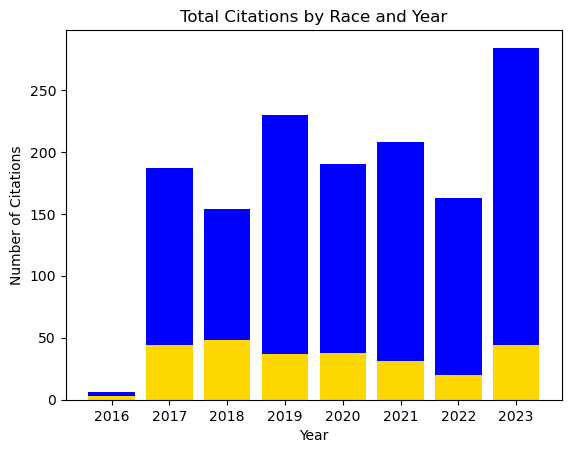

In [95]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y1 = mj_white_citation_year.groupby(['YEAR']).size()
y2 = mj_black_citation_year.groupby(['YEAR']).size()

plt.bar(x, y1,color='Gold')
plt.bar(x, y2, bottom=y1, color='Blue')
plt.title('Total Citations by Race and Year')
plt.ylabel('Number of Citations')
plt.xlabel('Year')
plt.show()

In [96]:
#Combine population data with mj_df

In [97]:
NBH_df = pd.read_csv(r"C:\Users\barrb\Downloads\NBHD1 - a8414ed5-c50f-417e-bb67-82b734660da6 (1).csv")

In [98]:
#View popluation df columns
NBH_df.columns

Index(['_id', 'Neighborhood', '2010_Total_Population',
       '2010_OneRace_Population', '2010_White_Alone_Population',
       '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population',
       'Change_2010_to_20

In [99]:
#Adjust columns of the population df
columns_nbhd = ['2020_Total_Population', 
           '2020_White_Alone_Population',
       '2020_Black_Alone_Population', 
           '2020_Hispanic_or_Latino_Population', 
           'ZONE']

In [100]:
#Create new df to reference adjusted columns
nbhd_df = NBH_df[columns_nbhd]

In [101]:
#Create a total population by zone for pct comparisons

In [102]:
total_population_by_zone = nbhd_df.groupby('ZONE')['2020_Total_Population'].sum().reset_index()

In [103]:
total_population_by_race = nbhd_df.groupby('ZONE').agg({
    '2020_Total_Population': 'sum', 
    '2020_White_Alone_Population': 'sum', 
    '2020_Black_Alone_Population': 'sum',
   '2020_Hispanic_or_Latino_Population' : 'sum'}).reset_index()

In [104]:
total_population_by_race

,ZONE,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population
0,1,38270,20357,14313,1205
1,2,33639,19444,10571,1283
2,3,47530,33754,8354,1792
3,4,90750,64131,7639,3675
4,5,47964,21846,20267,1659
5,6,44818,30416,7906,2006


In [105]:
#Create percentages for each race
total_population_by_race['White_pct'] = total_population_by_race['2020_White_Alone_Population'] / total_population_by_race['2020_Total_Population']
total_population_by_race['Black_pct'] = total_population_by_race['2020_Black_Alone_Population'] / total_population_by_race['2020_Total_Population']
total_population_by_race['Latino_pct'] = total_population_by_race['2020_Hispanic_or_Latino_Population'] / total_population_by_race['2020_Total_Population']

In [106]:
total_population_by_race

,ZONE,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population,White_pct,Black_pct,Latino_pct
0,1,38270,20357,14313,1205,0.531931,0.374001,0.031487
1,2,33639,19444,10571,1283,0.578020,0.314248,0.038140
2,3,47530,33754,8354,1792,0.710162,0.175763,0.037703
3,4,90750,64131,7639,3675,0.706678,0.084176,0.040496
4,5,47964,21846,20267,1659,0.455467,0.422546,0.034588
5,6,44818,30416,7906,2006,0.678656,0.176402,0.044759


In [107]:
#Because mj_df contains a string, change population 'ZONE' to contain string
total_population_by_race['ZONE'] = total_population_by_race['ZONE'].astype(str)

In [108]:
#Merge the two dataframes
mj_pop_df = mj_df.merge(total_population_by_race, on='ZONE', how='left')

In [109]:
mj_pop_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type,YEAR,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population,White_pct,Black_pct,Latino_pct
0,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest,2016,38270.0,20357.0,14313.0,1205.0,0.531931,0.374001,0.031487
2,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 02:04:00,1,-79.999646,40.455364,Arrest,2016,38270.0,20357.0,14313.0,1205.0,0.531931,0.374001,0.031487
3,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest,2016,44818.0,30416.0,7906.0,2006.0,0.678656,0.176402,0.044759
4,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest,2016,33639.0,19444.0,10571.0,1283.0,0.578020,0.314248,0.038140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 01:04:00,3,-79.982650,40.428755,Citation,2023,47530.0,33754.0,8354.0,1792.0,0.710162,0.175763,0.037703
15186,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation,2023,47530.0,33754.0,8354.0,1792.0,0.710162,0.175763,0.037703
15187,23.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:14:00,3,-79.983310,40.428693,Citation,2023,47530.0,33754.0,8354.0,1792.0,0.710162,0.175763,0.037703
15188,28.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:23:00,3,-79.983310,40.428693,Citation,2023,47530.0,33754.0,8354.0,1792.0,0.710162,0.175763,0.037703


In [110]:
#Create a 'dummie' variable to count the offenses by race

In [111]:
dummies = pd.get_dummies(mj_pop_df['RACE'], prefix='RACE')

In [112]:
df_with_dummies = pd.concat([mj_pop_df, dummies], axis=1)

In [113]:
arrest_only_condition =  df_with_dummies['record_type'].str.contains("Arrest", case=False)

In [114]:
arrest_only_df = df_with_dummies[arrest_only_condition]

In [115]:
arrest_only_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type,YEAR,...,White_pct,Black_pct,Latino_pct,RACE_A,RACE_B,RACE_H,RACE_I,RACE_O,RACE_U,RACE_W
0,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest,2016,...,NaN,NaN,NaN,False,False,False,False,False,False,True
1,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest,2016,...,0.531931,0.374001,0.031487,False,True,False,False,False,False,False
2,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 02:04:00,1,-79.999646,40.455364,Arrest,2016,...,0.531931,0.374001,0.031487,False,False,False,False,False,False,True
3,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest,2016,...,0.678656,0.176402,0.044759,False,True,False,False,False,False,False
4,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest,2016,...,0.578020,0.314248,0.038140,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,2023,...,0.578020,0.314248,0.038140,False,True,False,False,False,False,False
13724,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,2023,...,0.578020,0.314248,0.038140,False,True,False,False,False,False,False
13725,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,2023,...,0.578020,0.314248,0.038140,False,True,False,False,False,False,False
13726,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest,2006,...,0.531931,0.374001,0.031487,False,True,False,False,False,False,False


In [116]:
arrest_only_df.columns

Index(['AGE', 'GENDER', 'RACE', 'OFFENSES', 'DATE', 'ZONE', 'X', 'Y',
       'record_type', 'YEAR', '2020_Total_Population',
       '2020_White_Alone_Population', '2020_Black_Alone_Population',
       '2020_Hispanic_or_Latino_Population', 'White_pct', 'Black_pct',
       'Latino_pct', 'RACE_A', 'RACE_B', 'RACE_H', 'RACE_I', 'RACE_O',
       'RACE_U', 'RACE_W'],
      dtype='object')

In [117]:
arrest_only_df[['RACE_B','RACE_W', 'RACE_H', 'ZONE']]

,RACE_B,RACE_W,RACE_H,ZONE
0,False,True,False,OSC
1,True,False,False,1
2,False,True,False,1
3,True,False,False,6
4,True,False,False,2
...,...,...,...,...
13723,True,False,False,2
13724,True,False,False,2
13725,True,False,False,2
13726,True,False,False,1


In [118]:
offense_by_race_by_zone = arrest_only_df[['RACE_B','RACE_W', 'RACE_H','ZONE']]

In [119]:
offense_by_race_by_zone_2 = offense_by_race_by_zone.groupby('ZONE',).sum().reset_index()

In [120]:
#View total arrests by race for each zone
offense_by_race_by_zone_2

,ZONE,RACE_B,RACE_W,RACE_H
0,1,2230,1240,20
1,2,1318,570,16
2,3,1175,1159,16
3,4,659,440,8
4,5,2912,515,12
5,6,549,489,10
6,OSC,141,49,1


In [121]:
#Combine offense by race by zone with total population by zone
pd.merge(offense_by_race_by_zone_2, total_population_by_race)

,ZONE,RACE_B,RACE_W,RACE_H,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population,White_pct,Black_pct,Latino_pct
0,1,2230,1240,20,38270,20357,14313,1205,0.531931,0.374001,0.031487
1,2,1318,570,16,33639,19444,10571,1283,0.578020,0.314248,0.038140
2,3,1175,1159,16,47530,33754,8354,1792,0.710162,0.175763,0.037703
3,4,659,440,8,90750,64131,7639,3675,0.706678,0.084176,0.040496
4,5,2912,515,12,47964,21846,20267,1659,0.455467,0.422546,0.034588
5,6,549,489,10,44818,30416,7906,2006,0.678656,0.176402,0.044759


In [122]:
arrest_population_df =  pd.merge(offense_by_race_by_zone_2, total_population_by_race)

In [123]:
#View total arrests by race by zone
total_arrest_by_race = arrest_population_df['RACE_B'] + arrest_population_df['RACE_W'] + arrest_population_df['RACE_H']

In [124]:
total_arrest_by_race

0    3490
1    1904
2    2350
3    1107
4    3439
5    1048
dtype: int64

In [125]:
#Create arrest total column
arrest_population_df["Arrest Total"] = total_arrest_by_race

In [126]:
arrest_population_df

,ZONE,RACE_B,RACE_W,RACE_H,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population,White_pct,Black_pct,Latino_pct,Arrest Total
0,1,2230,1240,20,38270,20357,14313,1205,0.531931,0.374001,0.031487,3490
1,2,1318,570,16,33639,19444,10571,1283,0.578020,0.314248,0.038140,1904
2,3,1175,1159,16,47530,33754,8354,1792,0.710162,0.175763,0.037703,2350
3,4,659,440,8,90750,64131,7639,3675,0.706678,0.084176,0.040496,1107
4,5,2912,515,12,47964,21846,20267,1659,0.455467,0.422546,0.034588,3439
5,6,549,489,10,44818,30416,7906,2006,0.678656,0.176402,0.044759,1048


In [127]:
#Create arrest percentage for each race
arrest_population_df['Black_arrest_pct'] = arrest_population_df['RACE_B'] / arrest_population_df['Arrest Total']
arrest_population_df['White_arrest_pct'] = arrest_population_df['RACE_W'] / arrest_population_df['Arrest Total']
arrest_population_df['Hispanic_arrest_pct'] = arrest_population_df['RACE_H'] / arrest_population_df['Arrest Total']

In [128]:
arrest_population_df

,ZONE,RACE_B,RACE_W,RACE_H,2020_Total_Population,2020_White_Alone_Population,2020_Black_Alone_Population,2020_Hispanic_or_Latino_Population,White_pct,Black_pct,Latino_pct,Arrest Total,Black_arrest_pct,White_arrest_pct,Hispanic_arrest_pct
0,1,2230,1240,20,38270,20357,14313,1205,0.531931,0.374001,0.031487,3490,0.638968,0.355301,0.005731
1,2,1318,570,16,33639,19444,10571,1283,0.578020,0.314248,0.038140,1904,0.692227,0.299370,0.008403
2,3,1175,1159,16,47530,33754,8354,1792,0.710162,0.175763,0.037703,2350,0.500000,0.493191,0.006809
3,4,659,440,8,90750,64131,7639,3675,0.706678,0.084176,0.040496,1107,0.595303,0.397471,0.007227
4,5,2912,515,12,47964,21846,20267,1659,0.455467,0.422546,0.034588,3439,0.846758,0.149753,0.003489
5,6,549,489,10,44818,30416,7906,2006,0.678656,0.176402,0.044759,1048,0.523855,0.466603,0.009542


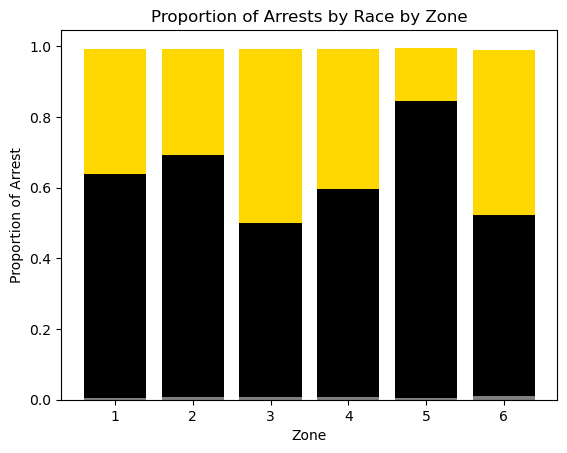

In [129]:
#Plot stacked bar graph for portion of arrest by race by zone
x = arrest_population_df['ZONE']
y1 = arrest_population_df['Black_arrest_pct']
y2 = arrest_population_df['White_arrest_pct']
y3 = arrest_population_df['Hispanic_arrest_pct']
# plot bars in stack manner

width = 0.25
plt.bar(x, y1, color='Black')
plt.bar(x, y2, bottom=y1, color='Gold')
plt.bar(x, y3, color='Grey')
plt.title('Proportion of Arrests by Race by Zone')
plt.ylabel('Proportion of Arrest')
plt.xlabel('Zone')
plt.show()

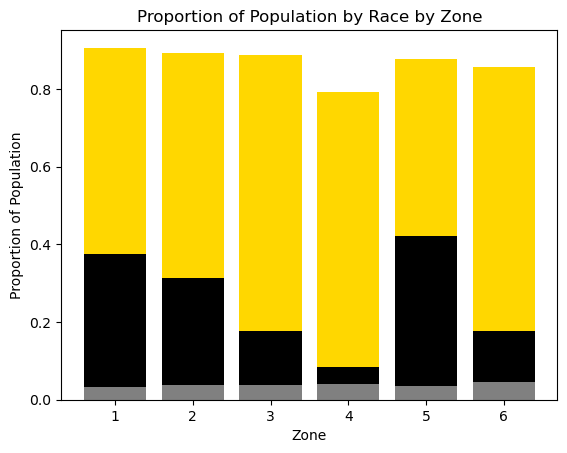

In [130]:
#plot stacked bar graph for population by race by zone
x = arrest_population_df['ZONE']
y1 = arrest_population_df['Black_pct']
y2 = arrest_population_df['White_pct']
y3 = arrest_population_df['Latino_pct']
# plot bars in stack manner

width = 0.25
plt.bar(x, y1, color='Black')
plt.bar(x, y2, bottom=y1, color='Gold')
plt.bar(x, y3, color='Grey')
plt.title('Proportion of Population by Race by Zone')
plt.ylabel('Proportion of Population')
plt.xlabel('Zone')
plt.show()

In [131]:
import sys, os

# gives the absolute path of .py and .ipynb where you are running your code. 
os.path.abspath("")

'C:\\Users\\barrb'

In [132]:
#Create graph for total arrest by race and gender by age 

In [225]:
#Create age bins 
bins = [9, 20, 40, 65, np.inf]
cats = ["9-20", "20-40", "40-65", "65+"]
mj_df['AgeRange'] = pd.cut(mj_df['AGE'], bins, labels=cats)

In [152]:
mj_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type,YEAR,AgeRange
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest,2016,20-40
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest,2016,40-65
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 02:04:00,1,-79.999646,40.455364,Arrest,2016,20-40
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest,2016,20-40
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest,2016,20-40
...,...,...,...,...,...,...,...,...,...,...,...
16259,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 01:04:00,3,-79.982650,40.428755,Citation,2023,20-40
16270,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation,2023,20-40
16280,23.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:14:00,3,-79.983310,40.428693,Citation,2023,20-40
16281,28.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:23:00,3,-79.983310,40.428693,Citation,2023,20-40


In [244]:
#Create a column to combine GENDER and RACE 
mj_df["GENDERRACE"] = mj_df['GENDER'] + mj_df['RACE']

In [229]:
#Set a condition to only look at arrests 
mj_df['record_type']=="Arrest"

1         True
14        True
16        True
19        True
22        True
         ...  
16259    False
16270    False
16280    False
16281    False
16294    False
Name: record_type, Length: 15190, dtype: bool

In [230]:
#Create a new df for arrests only 
mj_arrest_df = mj_df[mj_df['record_type']=="Arrest"]

In [232]:
mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size()

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\3888102237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size()


AgeRange  GENDERRACE
9-20      FA              1
          FB            180
          FH              1
          FO              6
          FU              4
                       ... 
65+       MU              0
          MW             22
          UB              0
          UU              0
          UW              0
Length: 64, dtype: int64

In [238]:
mj_gender_sex_df = mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\3923097802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_gender_sex_df = mj_arrest_df.groupby(['AgeRange', 'GENDERRACE']).size().reset_index()


In [239]:
mj_gender_sex_df

,AgeRange,GENDERRACE,0
0,9-20,FA,1
1,9-20,FB,180
2,9-20,FH,1
3,9-20,FO,6
4,9-20,FU,4
...,...,...,...
59,65+,MU,0
60,65+,MW,22
61,65+,UB,0
62,65+,UU,0


In [236]:
#Create a variable to capture only the combination of gender and race needed for analysis 
included_gr = ["MB", "MW", "FB", "FW"]

In [240]:
mj_gender_sex_df[mj_gender_sex_df['GENDERRACE'].isin(included_sr)]

,AgeRange,GENDERRACE,0
1,9-20,FB,180
5,9-20,FW,93
7,9-20,MB,1418
12,9-20,MW,206
17,20-40,FB,730
21,20-40,FW,963
23,20-40,MB,4720
28,20-40,MW,2093
33,40-65,FB,256
37,40-65,FW,286


In [242]:
mj_gender_sex_count = mj_gender_sex_count[mj_gender_sex_count['GENDERRACE'].isin(included_sr)]

In [243]:
mj_gender_sex_count

,AgeRange,GENDERRACE,0
1,9-20,FB,180
5,9-20,FW,93
7,9-20,MB,1418
12,9-20,MW,206
17,20-40,FB,730
21,20-40,FW,963
23,20-40,MB,4720
28,20-40,MW,2093
33,40-65,FB,256
37,40-65,FW,286


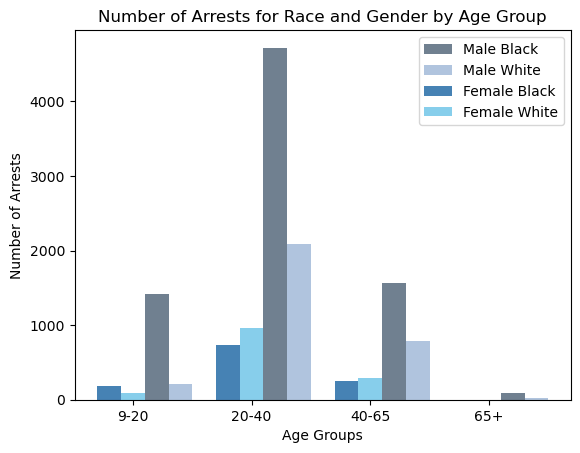

In [302]:
#Graph the relationship between arrest rate by gender and race by sex
xlabel = df['AgeRange'].drop_duplicates()
x = np.arange(4)
y1 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "MB"][0].to_numpy()
y2 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "MW"][0].to_numpy()
y3 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "FB"][0].to_numpy()
y4 = mj_gender_sex_count[mj_gender_sex_count["GENDERRACE"] == "FW"][0].to_numpy()

width = .2
plt.xticks(x, xlabel)
offset = .2
plt.bar(x + offset, y1, width, color="slategrey")
plt.bar(x + offset*2, y2, width, color="lightsteelblue")
plt.bar(x - offset, y3, width, color="steelblue")
plt.bar(x, y4, width, color="skyblue")
plt.legend(["Male Black", "Male White", "Female Black", "Female White"])
plt.xlabel("Age Groups")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests for Race and Gender by Age Group")
plt.show()

In [248]:
mj_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type,YEAR,AgeRange,SEXRACE,GENDERRACE
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest,2016,20-40,MW,MW
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest,2016,40-65,MB,MB
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 02:04:00,1,-79.999646,40.455364,Arrest,2016,20-40,FW,FW
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest,2016,20-40,MB,MB
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest,2016,20-40,FB,FB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 01:04:00,3,-79.982650,40.428755,Citation,2023,20-40,MB,MB
16270,26.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation,2023,20-40,MB,MB
16280,23.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:14:00,3,-79.983310,40.428693,Citation,2023,20-40,MB,MB
16281,28.0,M,B,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 01:23:00,3,-79.983310,40.428693,Citation,2023,20-40,MB,MB


In [249]:
#Create a condition to only look at citations in df
mj_df['record_type']=="Citation"

1        False
14       False
16       False
19       False
22       False
         ...  
16259     True
16270     True
16280     True
16281     True
16294     True
Name: record_type, Length: 15190, dtype: bool

In [262]:
#Create a new df for citations only 
mj_citation_df = mj_df[mj_df['record_type']=="Citation"]

In [263]:
mj_citation_df.groupby(['AgeRange', 'SEXRACE']).size()

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\1621090159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_citation_df.groupby(['AgeRange', 'SEXRACE']).size()


AgeRange  SEXRACE
9-20      FB          30
          FH           2
          FO           2
          FW          25
          MA           1
          MB         220
          MH           2
          MI           0
          MO           3
          MW          63
20-40     FB         107
          FH           1
          FO           4
          FW          38
          MA           2
          MB         683
          MH           5
          MI           1
          MO          14
          MW         105
40-65     FB          13
          FH           0
          FO           0
          FW           4
          MA           0
          MB          93
          MH           0
          MI           0
          MO           1
          MW          29
65+       FB           0
          FH           0
          FO           0
          FW           0
          MA           0
          MB           7
          MH           0
          MI           0
          MO           0
       

In [264]:
mj_gender_sex_citation = mj_citation_df.groupby(['AgeRange', 'SEXRACE']).size().reset_index()

C:\Users\barrb\AppData\Local\Temp\ipykernel_26992\242807146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mj_gender_sex_citation = mj_citation_df.groupby(['AgeRange', 'SEXRACE']).size().reset_index()


In [256]:
#Create a variable to capture only the combination of gender and race needed for analysis 
included_gr = ["MB", "MW", "FB", "FW"]

In [266]:
mj_gender_sex_citation[mj_gender_sex_citation['SEXRACE'].isin(included_sr)]

,AgeRange,SEXRACE,0
0,9-20,FB,30
3,9-20,FW,25
5,9-20,MB,220
9,9-20,MW,63
10,20-40,FB,107
13,20-40,FW,38
15,20-40,MB,683
19,20-40,MW,105
20,40-65,FB,13
23,40-65,FW,4


In [267]:
mj_gender_sex_count_citation = mj_gender_sex_citation[mj_gender_sex_citation['SEXRACE'].isin(included_sr)]

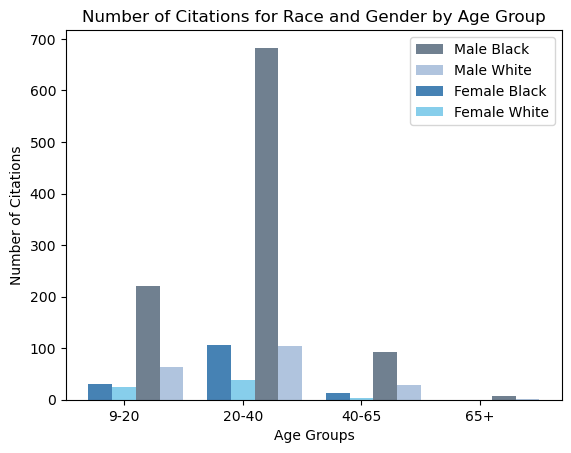

In [301]:
xlabel = df['AgeRange'].drop_duplicates()
x = np.arange(4)
y1 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["SEXRACE"] == "MB"][0].to_numpy()
y2 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["SEXRACE"] == "MW"][0].to_numpy()
y3 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["SEXRACE"] == "FB"][0].to_numpy()
y4 = mj_gender_sex_count_citation[mj_gender_sex_count_citation["SEXRACE"] == "FW"][0].to_numpy()

width = .2
plt.xticks(x, xlabel)
offset = .2
plt.bar(x + offset, y1, width, color="slategrey")
plt.bar(x + offset*2, y2, width, color="lightsteelblue")
plt.bar(x - offset, y3, width, color="steelblue")
plt.bar(x, y4, width, color="skyblue")
plt.legend(["Male Black", "Male White", "Female Black", "Female White"])
plt.xlabel("Age Groups")
plt.ylabel("Number of Citations")
plt.title("Number of Citations for Race and Gender by Age Group")
plt.show()

In [278]:
#Create a line graph including both arrest and citation rates across time

In [297]:
arrest_citation_by_year = mj_df.loc[(mj_df['YEAR'] >= 2017) & (mj_df['YEAR'] <= 2023)].\
                    groupby(['YEAR', 'record_type']).\
                    aggregate(Offenses = ('OFFENSES','count')).\
                    reset_index().\
                    set_index('YEAR').\
                    copy()

In [298]:
arrest_citation_by_year

,record_type,Offenses
YEAR,,
2017,Arrest,2930
2017,Citation,191
2018,Arrest,2555
2018,Citation,157
2019,Arrest,2360
2019,Citation,236
2020,Arrest,1800
2020,Citation,201
2021,Arrest,1125


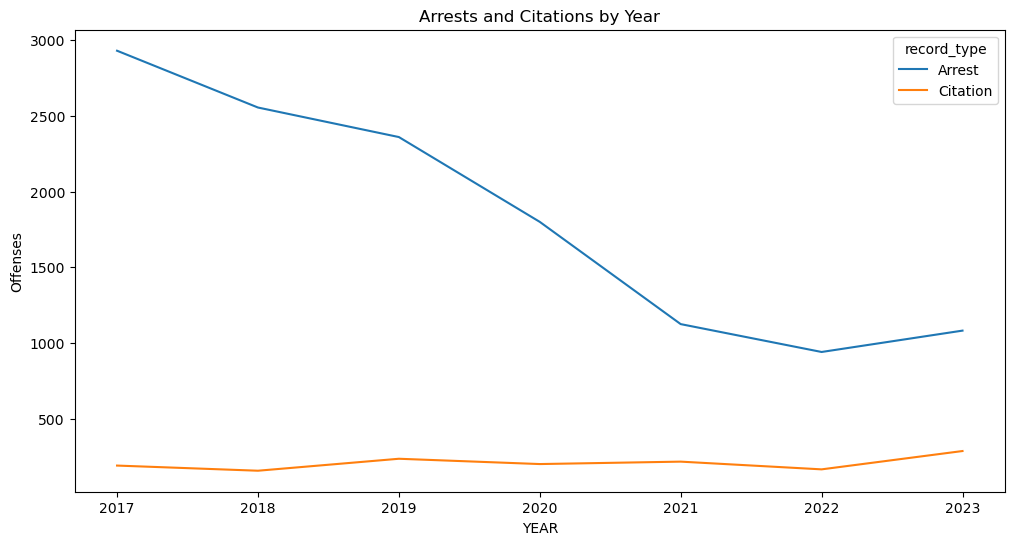

In [299]:
plt.figure(figsize=(12,6))
sns.lineplot(data=arrest_citation_by_year, x="YEAR", y="Offenses", hue='record_type')
plt.title('Arrests and Citations by Year')
plt.show()

In [300]:
#Create a pie chart to compare the number of single offesnse, multiple offense, and citation

In [303]:
#Create a df for each type of offense (already have citation)
mj_only_arrest

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
...,...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest


In [305]:
mj_only_arrest.loc[:, 'multiple_offenses'] = mj_only_arrest['OFFENSES'].str.contains('/')
# There are no cases where a citation lists multiple offenses, so automatically set the 'multiple_offenses' column to False where record_type is 'citation', to avoid confusion.
mj_only_arrest.loc[mj_only_arrest['record_type'] == 'citation', 'multiple_offenses'] = False
mj_only_arrest

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type,multiple_offenses
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest,False
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest,True
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest,True
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest,True
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest,True
...,...,...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,True
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,True
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest,True
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest,True


In [306]:
multiple_offenses_df = mj_only_arrest[mj_only_arrest['multiple_offenses'] == True]
multiple_offenses_df = multiple_offenses_df.drop('multiple_offenses', axis=1)
multiple_offenses_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
14,53.0,M,B,5123 Contraband. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2016-08-22 22:09:00,1,-80.001940,40.454137,Arrest
16,22.0,F,W,5505 Public Drunkenness / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(31) Marijuana: Possession Small Amount,2016-08-27 2:04:00,1,-79.999646,40.455364,Arrest
19,22.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance,2016-08-12 20:15:00,6,-80.066357,40.451602,Arrest
22,26.0,F,B,3929 Retail Theft. / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession,2016-08-29 11:20:00,2,-79.997406,40.441525,Arrest
33,32.0,M,W,4303 General Lighting Requirements. / 13(a)(31) Marijuana: Possession Small Amount,2016-08-13 17:08:00,2,-79.964925,40.452883,Arrest
...,...,...,...,...,...,...,...,...,...
66464,55.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66465,24.0,F,B,903 Criminal Conspiracy. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 4914 False Identification to Law Enforcement Authorities,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66466,50.0,M,B,13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 13(a)(30)* Delivery of Controlled Substance,2023-11-13 15:50:00,2,-79.999891,40.438220,Arrest
66470,44.0,F,B,13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount,2006-08-23 17:00:00,1,-80.005665,40.456913,Arrest


In [307]:
single_offense_df = mj_only_arrest[mj_only_arrest['multiple_offenses'] == False]
single_offense_df = single_offense_df.drop('multiple_offenses', axis=1)
single_offense_df

,AGE,GENDER,RACE,OFFENSES,DATE,ZONE,X,Y,record_type
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03 14:55:00,OSC,-80.088018,40.440136,Arrest
72,25.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-16 15:20:00,1,-80.000844,40.450893,Arrest
97,34.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-18 22:46:00,1,-79.997696,40.474594,Arrest
101,40.0,M,B,13(a)(31) Marijuana: Possession Small Amount,2016-08-26 13:14:00,5,-79.900579,40.464041,Arrest
102,23.0,M,B,13(a)(31) Marijuana: Possession Small Amount,2016-08-26 13:14:00,5,-79.900579,40.464041,Arrest
...,...,...,...,...,...,...,...,...,...
65962,33.0,M,B,13(a)(16) Possession of Controlled Substance,2023-10-19 17:48:00,2,-79.979621,40.444045,Arrest
66154,30.0,M,B,13(a)(16) Possession of Controlled Substance,2023-11-03 0:05:00,3,-79.980517,40.429236,Arrest
66199,22.0,M,B,13(a)(31) Marijuana: Possession Small Amount,2023-11-05 1:43:00,3,-79.983310,40.428693,Arrest
66398,35.0,M,W,13(a)(16) Possession of Controlled Substance,2023-07-13 6:00:00,1,-80.040504,40.488373,Arrest


In [308]:
mj_only_citation

,GENDER,RACE,AGE,OFFENSES,DATE,ZONE,X,Y,record_type
911,M,B,20.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-15 1:00:00,1,NaN,NaN,Citation
945,M,B,19.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-19 22:10:00,2,-80.001620,40.441773,Citation
947,M,B,48.0,627.02(b)(i) Possessing a small amount of marijuana,2016-12-20 1:30:00,5,-79.890381,40.455032,Citation
965,F,W,20.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
966,M,W,21.0,627.02(b)(ii) Smoking a small amount of marijuana in any public space,2016-12-26 0:51:00,4,-79.952018,40.451884,Citation
...,...,...,...,...,...,...,...,...,...
16259,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-05 1:04:00,3,-79.982650,40.428755,Citation
16270,M,B,26.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-07 17:46:00,3,-79.984467,40.403678,Citation
16280,M,B,23.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:14:00,3,-79.983310,40.428693,Citation
16281,M,B,28.0,627.02(b)(i) Possessing a small amount of marijuana,2023-11-11 1:23:00,3,-79.983310,40.428693,Citation


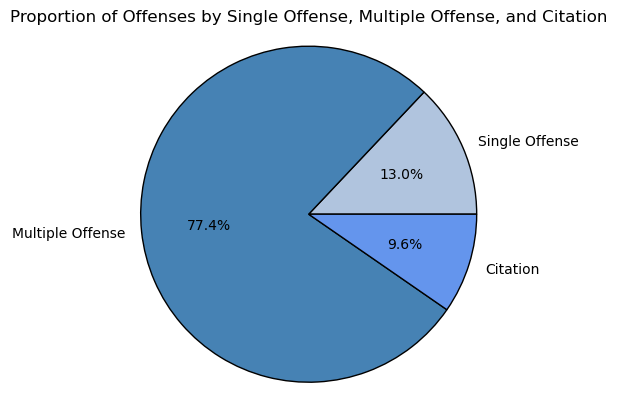

In [333]:
labels = ['Single Offense', 'Multiple Offense', 'Citation']
sizes = [1968 , 11760, 1462]
colors = ['lightsteelblue', 'steelblue', 'cornflowerblue']

# Create the pie chart
fig, ax = plt.subplots()
plt.title("Proportion of Offenses by Single Offense, Multiple Offense, and Citation")
ax.pie(sizes, labels=labels, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

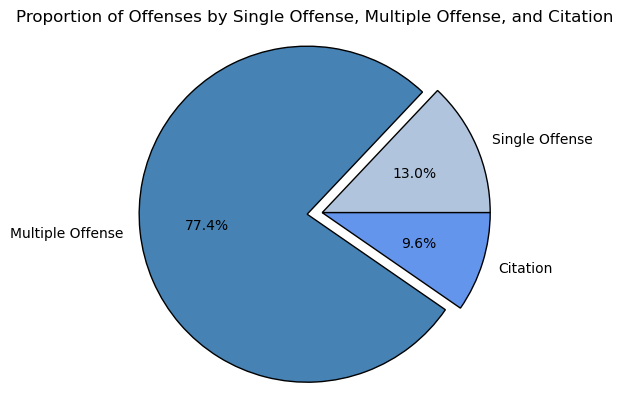

In [332]:
labels = ['Single Offense', 'Multiple Offense', 'Citation']
sizes = [1968 , 11760, 1462]
colors = ['lightsteelblue', 'steelblue', 'cornflowerblue']
explode = [0, 0.09, 0]

# Create the pie chart
fig, ax = plt.subplots()
plt.title("Proportion of Offenses by Single Offense, Multiple Offense, and Citation")
ax.pie(sizes, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, colors=colors, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()